 ** Examining experiment: BrainScanner20160506_155051 from AML18_moving.hdf5 **


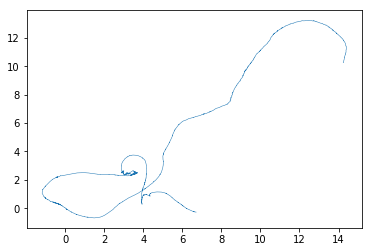

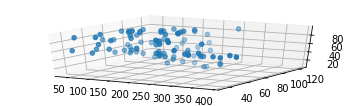

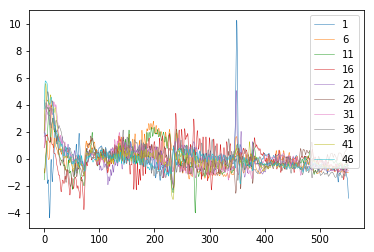

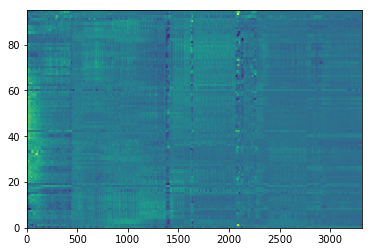

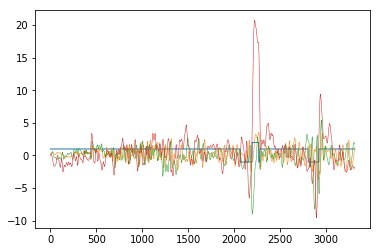

 ** Examining experiment: BrainScanner20160506_160928 from AML18_moving.hdf5 **


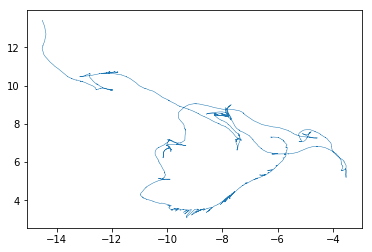

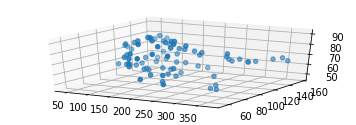

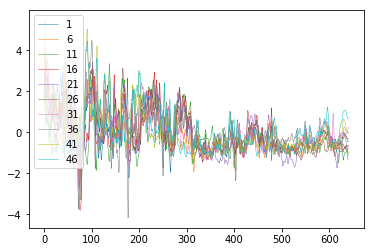

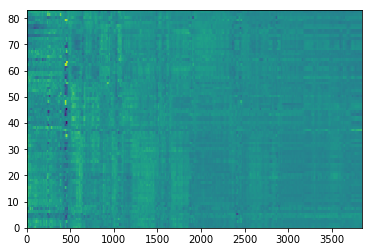

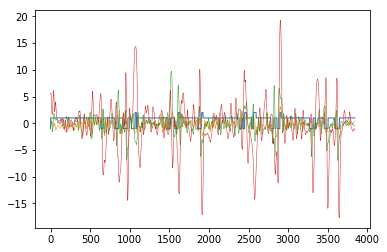

 ** Examining experiment: BrainScanner20180223_141721 from AML175_moving.hdf5 **


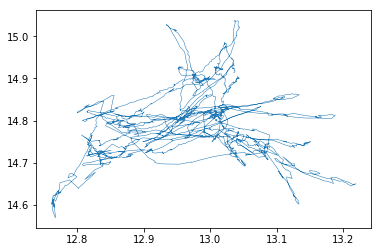

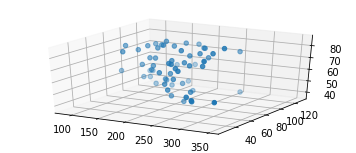

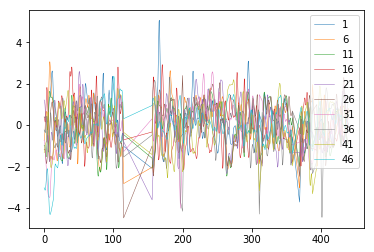

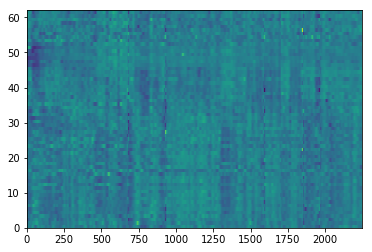

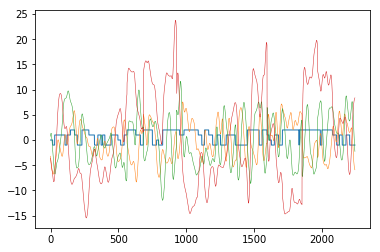

 ** Examining experiment: BrainScanner20180223_142554 from AML175_moving.hdf5 **


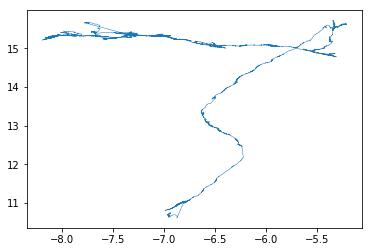

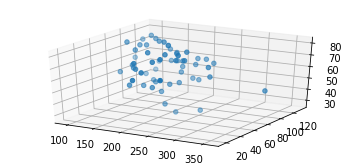

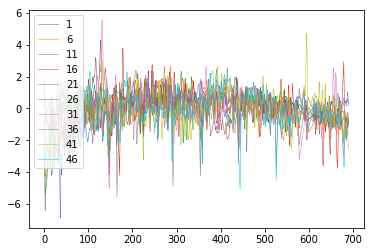

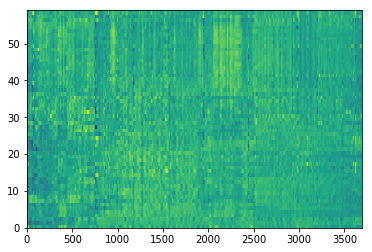

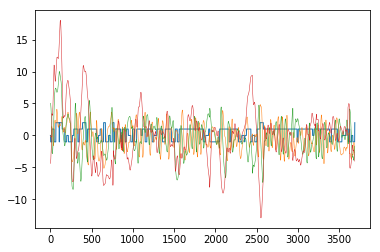

 ** Examining experiment: BrainScanner20180330_160650 from AML175_moving.hdf5 **


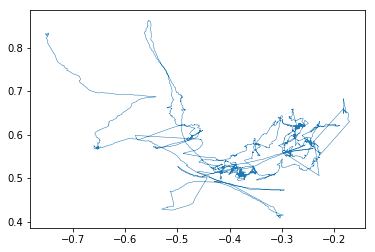

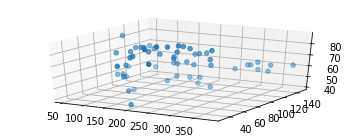

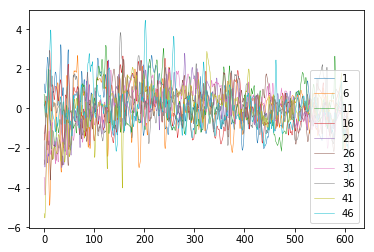

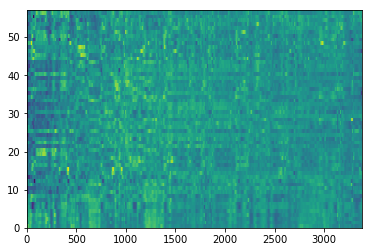

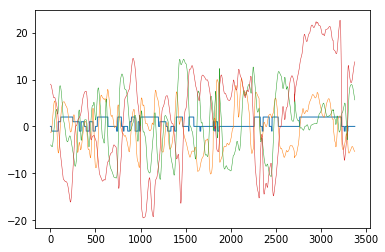

 ** Examining experiment: BrainScanner20180330_162137 from AML175_moving.hdf5 **


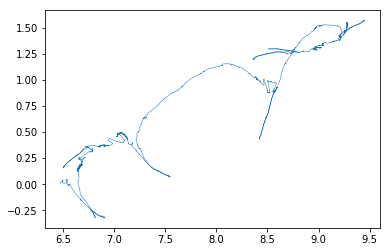

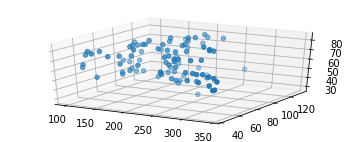

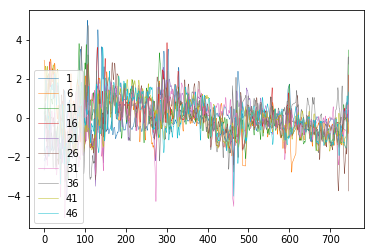

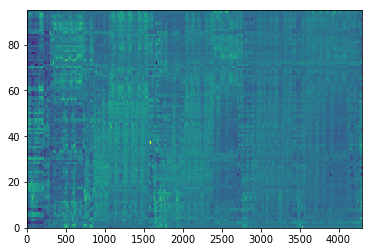

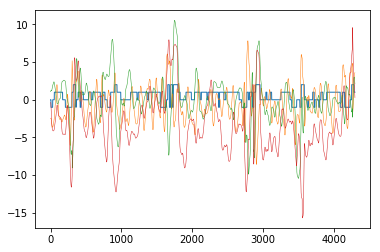

In [48]:
import h5py
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

filenames = ['AML18_moving.hdf5','AML175_moving.hdf5']
#filenames = ['AML18_moving.hdf5']

for filename in filenames:

    celegans_h5 = h5py.File(filename, 'r')
    exps = np.array(celegans_h5['/'])
    for exp in exps:
        print(' ** Examining experiment: %s from %s **'%(exp,filename))
        ns = np.array(celegans_h5['/%s/Neurons'%exp])
        behas = np.array(celegans_h5['/%s/Behavior'%exp])
        #print behas
        #print ns
        xs = np.array(celegans_h5['/%s/Behavior/X'%exp])
        ys = np.array(celegans_h5['/%s/Behavior/Y'%exp])
        fig = plt.figure()
        plt.plot(xs, ys, lw=.5)
        
        positions = np.array(celegans_h5['/%s/Neurons/Positions'%exp])
        #print positions
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(positions[0],positions[1],positions[2])
        ax.set_aspect('equal')
        
        fig = plt.figure()
        activity = np.array(celegans_h5['/%s/Neurons/Activity'%exp])
        #print activity[0]
        times = np.array(celegans_h5['/%s/Neurons/Time'%exp])
        #print times

        for i in xrange(1, 50,5):
            plt.plot(times, activity[i], lw=.5, label='%s'%i)

        plt.legend()

        hm_fig, hm_ax = plt.subplots()
        hm_ax.pcolormesh(activity)



        
        eth = np.array(celegans_h5['/%s/Behavior/Ethogram'%exp])
        ethFull = np.array(celegans_h5['/%s/Behavior/EthogramFull'%exp])
        
        ew1 = np.array(celegans_h5['/%s/Behavior/Eigenworm1'%exp])
        ew2 = np.array(celegans_h5['/%s/Behavior/Eigenworm2'%exp])
        ew3 = np.array(celegans_h5['/%s/Behavior/Eigenworm3'%exp])
        
        fig = plt.figure()
        plt.plot(eth, lw=1)
        #plt.plot(ethFull, lw=1)
        plt.plot(ew1, lw=.5)
        plt.plot(ew2, lw=.5)
        plt.plot(ew3, lw=.5)

        plt.show()
